<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Artificial Neurons and Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In this example notebook we will again be working with the breast cancer dataset from the University of Wisconsin.

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X,y= np.array(X),np.array(y)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

data.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Let's scale our data to help the algorithm converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Artificial Neurons: The Perceptron

In [4]:
class Perceptron:
    
    def __init__(self,eta=0.01,n_iter=100,random_state=0):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        # Initialize the weights to small random numbers
        rgen=np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0,scale=0.01,size=(1+X.shape[1]))
        
        # Train the perceptron using stochastic gradient descent
        self.error_counts=[]
        for i in range(self.n_iter):
            # Keep track of errors for each iteration
            error_count=0
            # Stochastic gradient descent
            for xi,yi in zip(X,y):
                yhat = self.predict(xi)
                error = yi-yhat
                delta_weights = -self.eta * error * xi
                delta_bias = -self.eta * error * 1
                # Update the weights
                self.weights[1:] -= delta_weights
                # Update bias
                self.weights[0] -= delta_bias
                # Count errors
                error_count += int(error != 0)
            self.error_counts.append(error_count)
        return self
    
    def predict(self,X):
        z = np.dot(X,self.weights[1:]) + self.weights[0]
        if z >= 0.0:
            yhat = 1
        else:
            yhat = 0
        return yhat

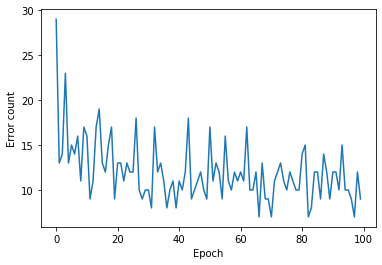

In [5]:
perceptron_model = Perceptron(eta=0.01,n_iter=100)
perceptron_model.fit(X_train_scaled,y_train)
plt.plot(range(len(perceptron_model.error_counts)),perceptron_model.error_counts)
plt.xlabel('Epoch')
plt.ylabel('Error count')
plt.show()

In [6]:
test_preds = []
for x in X_test_scaled:
    pred = perceptron_model.predict(x)
    test_preds.append(pred)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.939


## Multilayer Perceptron (MLP) with Scikit Learn
The Multilayer Perceptron model is a simple form of a neural network. We can build one very simply using Scikit-Learn's implementation.  Let's start by using a simple MLP with a single hidden layer containing 100 units and a logistic (sigmoid) activation function.

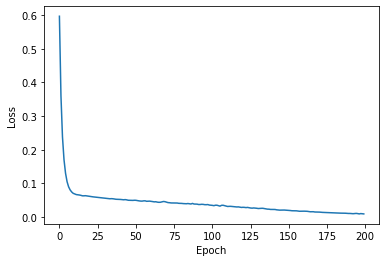

In [16]:
# Let's use SKLearn's MLP algorithm to demonstrate a neural network
# We will start with a shallow network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),activation='logistic',learning_rate_init=0.01,random_state=0)
mlp_model.fit(X_train_scaled,y_train)

# Let's plot the loss curve on the training set
plt.plot(mlp_model.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [17]:
# Generate the predictions on the test set and calculate the test set accuracy
test_preds = mlp_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.982


Now let's run another MLP model using 4 hidden layers rather than one, and a ReLU activation function rather than the sigmoid function we used previously.

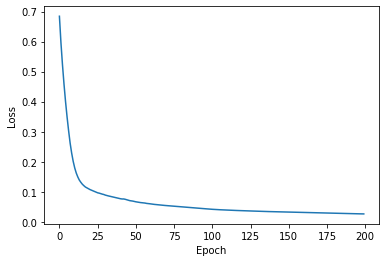

In [18]:
# Let's try a deeper network and use a relu activation function
mlp_model_deep = MLPClassifier(hidden_layer_sizes=(100,50,20,10),activation='relu',learning_rate_init=0.001,
                               max_iter=200,alpha=0.1,random_state=0)
mlp_model_deep.fit(X_train_scaled,y_train)

# Let's plot the loss curve on the training set
plt.plot(mlp_model_deep.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
# Generate the predictions on the test set and calculate the test set accuracy
test_preds = mlp_model_deep.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.974


## [OPTIONAL]: Neural Network from Scratch
The following example will demonstrate how to build a simple fully-connected neural network with a single hidden layer, without the help of Scikit-Learn.  We will create a class `NeuralNetfromScratch` which sets up the neural network architecture and contains a method `fit()` to train the model and `predict()` to generate predictions.

We will use a softmax activation function on the output (so it is extensible to multiclass problems) and the cross-entropy loss:  

$ L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) $

And we will include regularization so the total loss is the cross-entropy loss plus the regularization loss, averaged across all observations:

$ L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss} \\\\ $

In [56]:
class NeuralNetfromScratch:
    # Neural network with a single hidden layer with relu activation function
    # Output layer will use a softmax activation
    
    def __init__(self,eta=0.01,n_iter=100,hidden_size=100,reg=1e-3,random_state=0):
        self.eta=eta # Learning rate
        self.n_iter=n_iter # Number of epochs
        self.hidden_size=hidden_size # Hidden layer size
        self.reg=1e-3 # Regularization penalty
        self.random_state=random_state
    
    def fit(self,X,y):
        # Initialize the weights to small random numbers
        self.W1 = 0.01 * np.random.randn(X.shape[1],self.hidden_size) # Input layer weights
        self.b1 = np.zeros((1,self.hidden_size))
        self.W2 = 0.01 * np.random.randn(self.hidden_size,len(np.unique(y))) # Hidden layer weights
        self.b2 = np.zeros((1,len(np.unique(y))))
        
        # gradient descent loop
        for i in range(self.n_iter):
            
            # Forward pass through the model
            yhat = self.predict(X)
            
            # Compute the total loss = average cross-entropy loss + regularization loss
            # Avg cross-entropy loss: 1/N * (-log(normalized probability of correct class))
            # Regularization loss: 0.5 * reg * sum of weights squared, across all features and classes
            
            # Get the log probabilities assigned by the model to the correct classes
            correct_logprobs = -np.log(yhat[range(X.shape[0]),y])
            
            # Calculate the cross-entropy loss
            data_loss = np.sum(correct_logprobs)/X.shape[0]
            # Calculate the regularization loss
            reg_loss = 0.5*self.reg*np.sum(self.W1*self.W1) + 0.5*self.reg*np.sum(self.W2*self.W2)
            # Total loss = cross-entropy-loss + regularization loss
            loss = data_loss + reg_loss
            
            if i % 1000 == 0:
                print("iteration {:d}: loss {:.5f}".format(i, loss))
            
            # Calculate the gradient of the loss with respect to z2 (output layer error term)
            # Gradient of loss wrt z2: a2 - 1(y=k)
            d_z2 = yhat
            d_z2[range(len(X)),y] -= 1
            d_z2 /= X.shape[0]
            
            # Backpropate the gradient to the parameters
            
            # Backpropagate to get gradient wrt W2 and b2
            z1 = np.dot(X, self.W1) + self.b1
            a1 = np.maximum(0, z1) # relu
            d_W2 = np.dot(a1.T, d_z2)
            d_b2 = np.sum(d_z2, axis=0, keepdims=True)
            
            # Calculate hidden layer error term d_z1
            d_z1 = np.dot(d_z2, self.W2.T)
            # Backpropagate the ReLU non-linearity
            d_z1[a1 <= 0] = 0
            # Backprop to get gradient of loss wrt W1 and b1 (X * hidden layer error term d_z1)
            d_W1 = np.dot(X.T, d_z1)
            d_b1 = np.sum(d_z1, axis=0, keepdims=True)
            
            # Add regularization gradient contribution to the gradients of weights
            d_W2 += self.reg * self.W2
            d_W1 += self.reg * self.W1
            
            # Update the weights and biases
            self.W1 += -self.eta * d_W1
            self.b1 += -self.eta * d_b1
            self.W2 += -self.eta * d_W2
            self.b2 += -self.eta * d_b2
            
        return self
    
    def predict(self,X):
        # Feed data through the neural network
        z1 = np.dot(X, self.W1) + self.b1 # Linear combination of W1 and input features
        a1 = np.maximum(0, z1) # Output of first hidden layer incl. relu
        z2 = np.dot(a1, self.W2) + self.b2 # Linear combination of hidden layer output a1 and output layer weights
        # Compute the class probabilities using softmax
        a2 = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True) # Shape: (num_examples,num_classes)
        return a2


nn_model = NeuralNetfromScratch(eta=0.05,n_iter=25000)
nn_model.fit(X_train_scaled,y_train)

iteration 0: loss 0.69456
iteration 1000: loss 0.05150
iteration 2000: loss 0.03976
iteration 3000: loss 0.03379
iteration 4000: loss 0.03014
iteration 5000: loss 0.02774
iteration 6000: loss 0.02618
iteration 7000: loss 0.02512
iteration 8000: loss 0.02437
iteration 9000: loss 0.02382
iteration 10000: loss 0.02338
iteration 11000: loss 0.02302
iteration 12000: loss 0.02273
iteration 13000: loss 0.02250
iteration 14000: loss 0.02231
iteration 15000: loss 0.02215
iteration 16000: loss 0.02201
iteration 17000: loss 0.02189
iteration 18000: loss 0.02179
iteration 19000: loss 0.02170
iteration 20000: loss 0.02162
iteration 21000: loss 0.02154
iteration 22000: loss 0.02148
iteration 23000: loss 0.02142
iteration 24000: loss 0.02137


In [57]:
# Evaluate accuracy on the test set
yhat = nn_model.predict(X_test_scaled)
predicted_class = np.argmax(yhat, axis=1)
print('Test set accuracy: {:.3f}'.format(np.mean(predicted_class == y_test)))

Test set accuracy: 0.965
